# Aplicación TSNE y DBSCAN

####  Se realizará una reducción de dimensión en los datos procesados de demanda energética y se aplicará el algoritmo de DBSCAN para intentar identificar clusters.

In [1]:
import pandas as pd
import numpy as np
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN

In [2]:
df = pd.read_csv('../data/processed/processed_data_energy.csv')
df.head()

,hora,dia,mes,anio,tmax-cab,tmax-hmo,tmax-obr,tmax-lmo,tmax-cul,tmin-cab,...,martes_postfestivo,semana_santa,1_mayo,10_mayo,16_sep,2_nov.,pre-navidad_y_new_year,navidad_y_new_year,post-navidad_y_new_year,demanda_energia
0,0,1,1,2007,21.0,22.0,25.0,30.0,29.0,2.0,...,0,0,0,0,0,0,0,1,0,1394
1,1,1,1,2007,21.0,22.0,25.0,30.0,29.0,2.0,...,0,0,0,0,0,0,0,1,0,1297
2,2,1,1,2007,21.0,22.0,25.0,30.0,29.0,2.0,...,0,0,0,0,0,0,0,1,0,1255
3,3,1,1,2007,21.0,22.0,25.0,30.0,29.0,2.0,...,0,0,0,0,0,0,0,1,0,1222
4,4,1,1,2007,21.0,22.0,25.0,30.0,29.0,2.0,...,0,0,0,0,0,0,0,1,0,1168


In [3]:
# Convertimos el dataframe a un arreglo numpy
X = np.array(df)

#### Aplicaremos primero el método TSNE de reducción de dimensionalidad. Probaremos con varios parámetros, en este caso, distintos valores para perplexity y early_exaggeration.

In [4]:
perplexities = [80, 90, 100]
early_exaggerations = [60, 70]

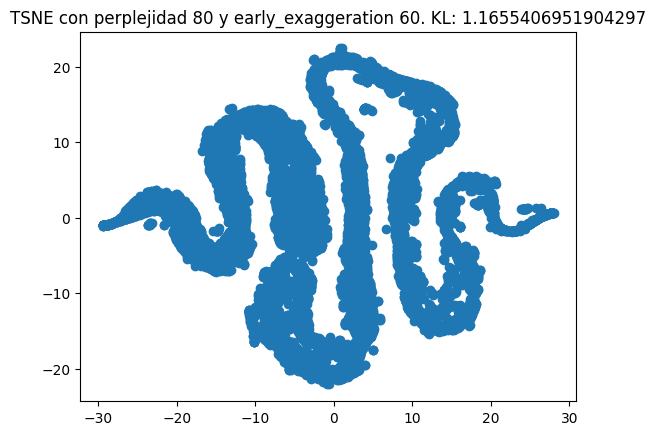

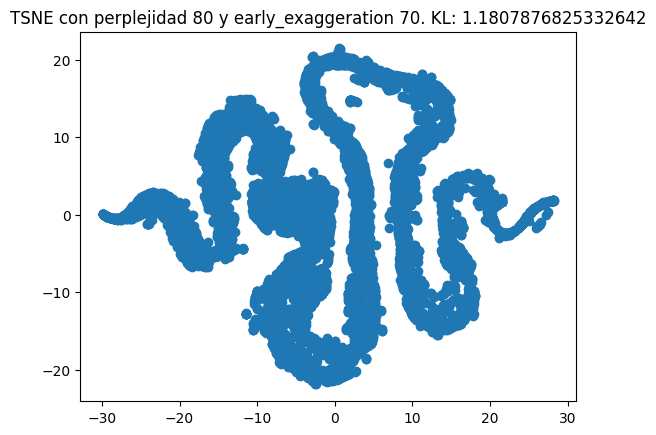

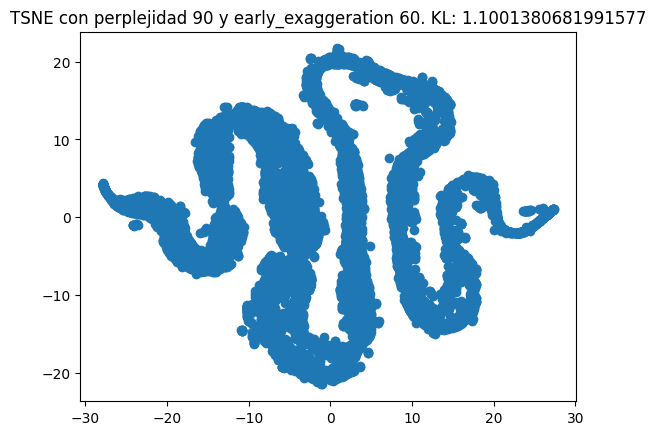

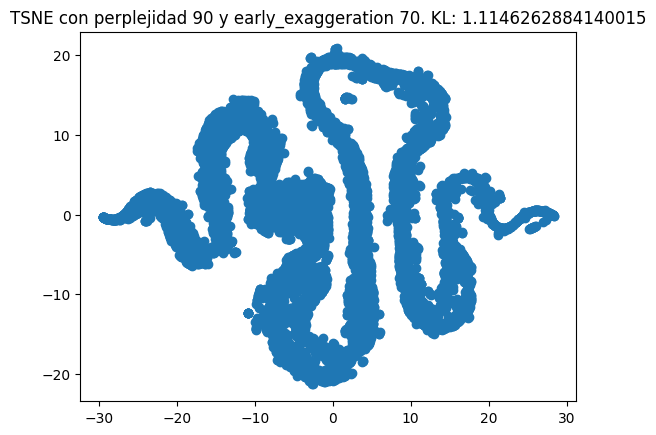

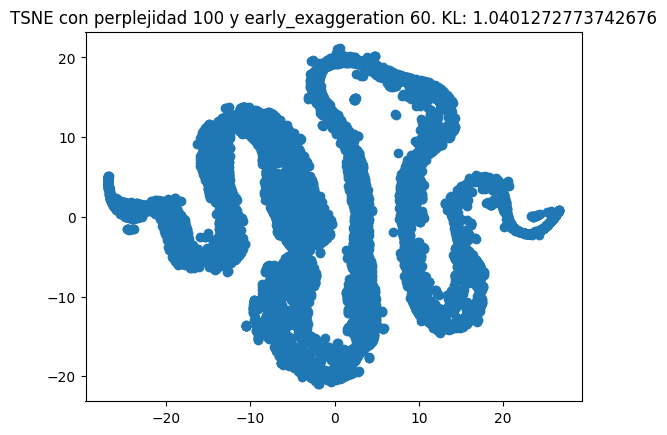

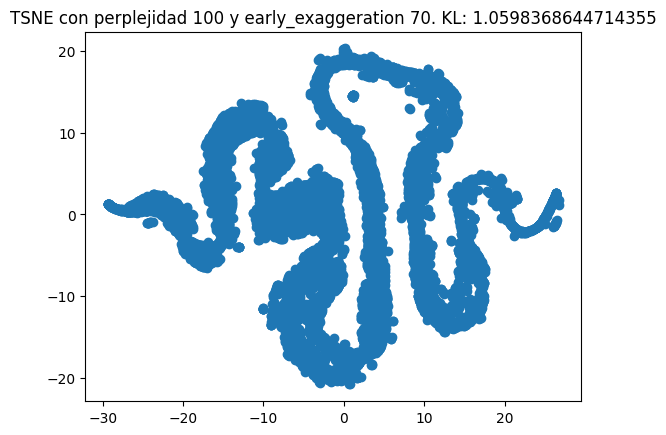

In [31]:
for perplexity in perplexities:
    for early_exaggeration in early_exaggerations:
        tsne = TSNE(n_components =2 , n_iter = 500, perplexity = perplexity, early_exaggeration = early_exaggeration)
        X_embedded = tsne.fit_transform(X[0:10000])
        plt.title(f'TSNE con perplejidad {perplexity} y early_exaggeration {early_exaggeration}. KL: {tsne.kl_divergence_}')
        plt.scatter(X_embedded[:,0], X_embedded[:,1])
        plt.show()


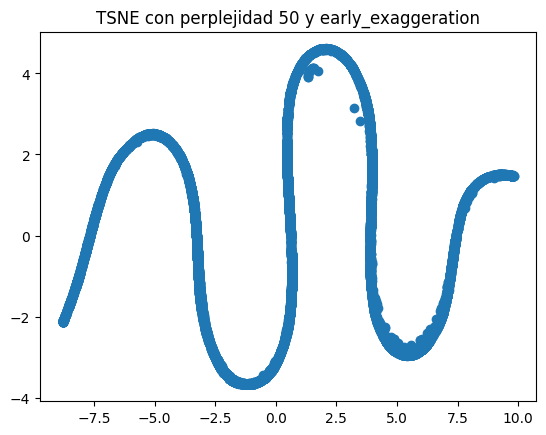

In [6]:
X_embedded = TSNE(n_components =2 , n_iter = 250, perplexity = 50).fit_transform(X[0:10000])
df_2d = pd.DataFrame(X_embedded, columns = ['x', 'y'])
plt.title(f'TSNE con perplejidad 50 y early_exaggeration')
plt.scatter(df_2d['x'], df_2d['y'])
plt.show()

### Aplicaremos ahora el algoritmo de DBSCAN. Probaremos distintos valores para el parámetro eps.

In [28]:
clustering = DBSCAN(eps = 0.05).fit(X_embedded)
clustering.labels_

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

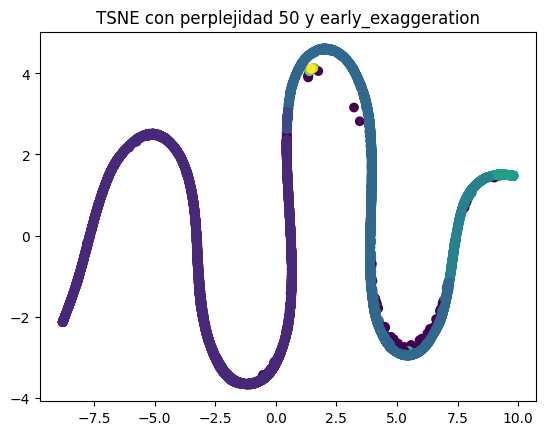

In [29]:
plt.title(f'TSNE con perplejidad 50 y early_exaggeration')
plt.scatter(X_embedded[:,0], X_embedded[:,1], c = clustering.labels_)
plt.show()